In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

nba_data2023 = pd.read_csv('nba_per_game_processed.csv', encoding = 'unicode_escape', engine ='python')

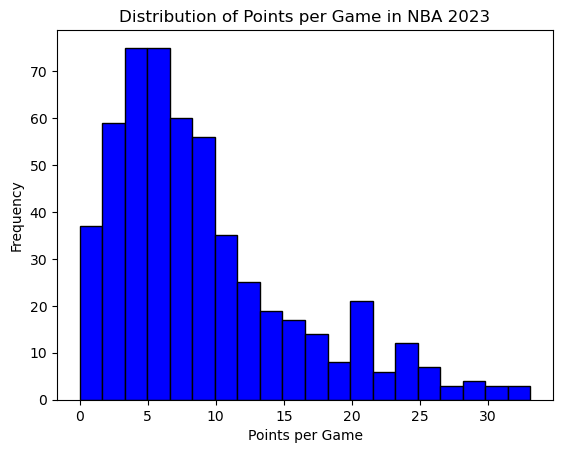

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pts_column = nba_data2023['PTS']

plt.hist(pts_column, bins=20, color='blue', edgecolor='black')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game in NBA 2023')
plt.show()

In [6]:
mean_pts = nba_data2023['PTS'].mean()

median_pts = nba_data2023['PTS'].median()

std_pts = nba_data2023['PTS'].std()

print("Mean PTS:", mean_pts)
print("Median PTS:", median_pts)
print("Standard Deviation of PTS:", std_pts)

Mean PTS: 9.121335807050093
Median PTS: 7.0
Standard Deviation of PTS: 6.842215971590921


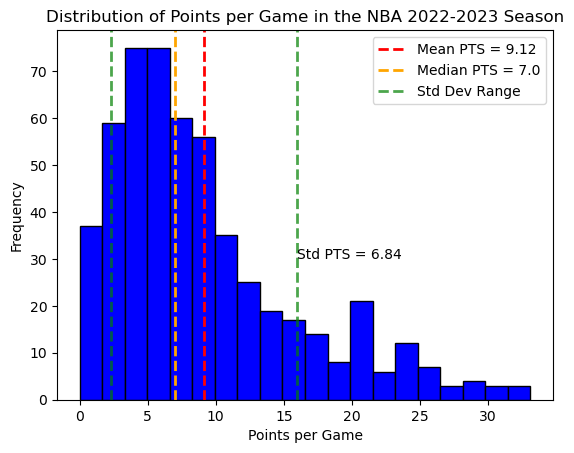

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

nba_data2023 = pd.read_csv('nba_per_game_processed.csv', encoding = 'unicode_escape', engine ='python')

pts_column = nba_data2023['PTS']

mean_pts = pts_column.mean()
median_pts = pts_column.median()
std_pts = pts_column.std()

# Create a histogram
plt.hist(pts_column, bins=20, color='blue', edgecolor='black')
plt.axvline(mean_pts, color='red', linestyle='dashed', linewidth=2, label=f'Mean PTS = {mean_pts:.2f}')
plt.axvline(median_pts, color='orange', linestyle='dashed', linewidth=2, label=f'Median PTS = {median_pts}')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game in the NBA 2022-2023 Season')

# Annotate the standard deviation
plt.annotate(f'Std PTS = {std_pts:.2f}', xy=(mean_pts + std_pts, 30), color='black')

plt.axvline(mean_pts + std_pts, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev Range', alpha=0.7)
plt.axvline(mean_pts - std_pts, color='green', linestyle='dashed', linewidth=2, alpha=0.7)

plt.legend()
plt.show()



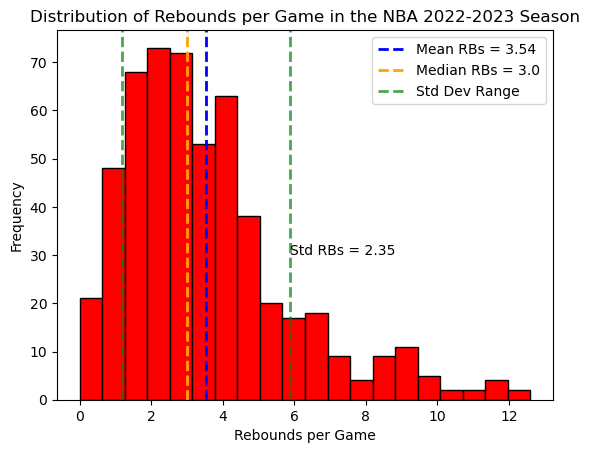

In [27]:
import pandas as pd
import matplotlib.pyplot as plt



nba_data2023['Total Rebounds'] = nba_data2023['DRB'] + nba_data2023['ORB']

total_rebounds_column = nba_data2023['Total Rebounds']
median_total_rebounds = nba_data2023['Total Rebounds'].median()
std_total_rebounds = nba_data2023['Total Rebounds'].std()
mean_total_rebounds = nba_data2023['Total Rebounds'].mean()

plt.hist(total_rebounds_column, bins=20, color='red', edgecolor='black')
plt.axvline(mean_total_rebounds, color='blue', linestyle='dashed', linewidth=2, label=f'Mean RBs = {mean_total_rebounds:.2f}')
plt.axvline(median_total_rebounds, color='orange', linestyle='dashed', linewidth=2, label=f'Median RBs = {median_total_rebounds}')
plt.xlabel('Rebounds per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Rebounds per Game in the NBA 2022-2023 Season')

plt.annotate(f'Std RBs = {std_total_rebounds:.2f}', xy=(mean_total_rebounds + std_total_rebounds, 30), color='black')

plt.axvline(mean_total_rebounds + std_total_rebounds, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev Range', alpha=0.7)
plt.axvline(mean_total_rebounds - std_total_rebounds, color='green', linestyle='dashed', linewidth=2, alpha=0.7)

plt.legend()
plt.show()


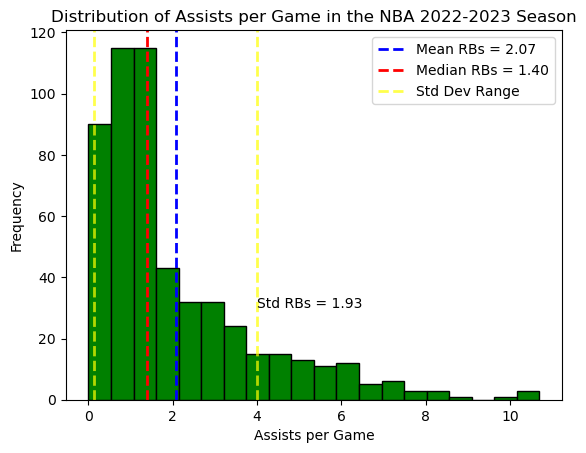

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

ast_column = nba_data2023['AST']

mean_ast = nba_data2023['AST'].mean()
median_ast = nba_data2023['AST'].median()
std_ast = nba_data2023['AST'].std()

plt.hist(ast_column, bins=20, color='green', edgecolor='black')
plt.axvline(mean_ast, color='blue', linestyle='dashed', linewidth=2, label=f'Mean RBs = {mean_ast:.2f}')
plt.axvline(median_ast, color='red', linestyle='dashed', linewidth=2, label=f'Median RBs = {median_ast:.2f}')
plt.xlabel('Assists per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Assists per Game in the NBA 2022-2023 Season')

plt.annotate(f'Std RBs = {std_ast:.2f}', xy=(mean_ast + std_ast, 30), color='black')

plt.axvline(mean_ast + std_ast, color='yellow', linestyle='dashed', linewidth=2, label=f'Std Dev Range', alpha=0.7)
plt.axvline(mean_ast - std_ast, color='yellow', linestyle='dashed', linewidth=2, alpha=0.7)


plt.legend()
plt.show()

In [37]:
nba_data2023_v2 = pd.read_csv('nba_per_game_processed.csv', encoding = 'unicode_escape', engine ='python')

missing_data = nba_data2023_v2.isnull().sum()

print("Columns with missing data:")
print(missing_data[missing_data > 0])


Columns with missing data:
3P%    2
2P%    3
FT%    3
dtype: int64


In [38]:
columns_to_fill = ['3P%', '2P%', 'FT%']

nba_data2023_v2[columns_to_fill] = nba_data2023_v2[columns_to_fill].fillna(0)

missing_data_updated = nba_data2023_v2[columns_to_fill].isnull().sum()

print('Columns with missing data after filling:')
print(missing_data_updated)

Columns with missing data after filling:
3P%    0
2P%    0
FT%    0
dtype: int64


Sample Mean: 8.68
Population Mean: 9.12
Confidence Interval (Lower): 8.20
Confidence Interval (Upper): 9.16
T-statistic: -0.34
P-value: 0.74
Fail to reject the null hypothesis: The sample is likely from the same population.


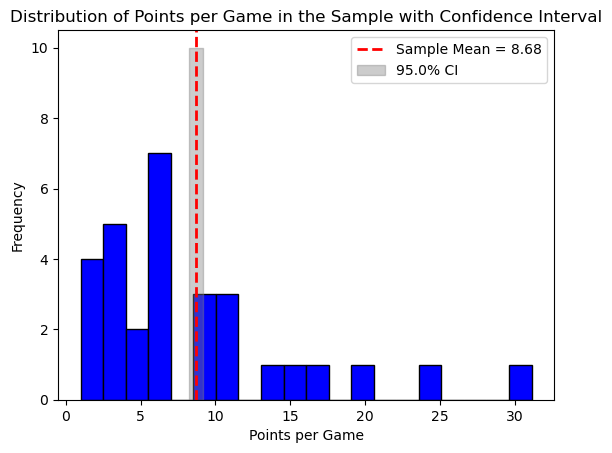

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, ttest_1samp


# Select a random sample (e.g., sample size of 30) from your dataset
sample = nba_data2023.sample(n=30, random_state=42) 

# Calculate the sample mean and standard error of the mean (SEM)
sample_mean = sample['PTS'].mean() 

sample_size = len(sample)
sem = sample['PTS'].sem()  # Standard error of the mean

# Define population mean and confidence level
population_mean = nba_data2023['PTS'].mean()
confidence_level = 0.95 

# Calculate the t-statistic for the confidence interval
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, df=sample_size - 1)

# Calculate the margin of error
margin_of_error = t_critical * (sem / np.sqrt(sample_size))

# Calculate the confidence interval bounds
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample['PTS'], population_mean)  #

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Population Mean: {population_mean:.2f}")
print(f"Confidence Interval (Lower): {ci_lower:.2f}")
print(f"Confidence Interval (Upper): {ci_upper:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < alpha:
    print("Reject the null hypothesis: The sample is likely not from the same population.")
else:
    print("Fail to reject the null hypothesis: The sample is likely from the same population.")

# Creates a confidence interval graph
plt.hist(sample['PTS'], bins=20, color='blue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Sample Mean = {sample_mean:.2f}')
plt.fill_betweenx([0, 10], ci_lower, ci_upper, color='gray', alpha=0.4, label=f'{confidence_level*100}% CI')

plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game in the Sample with Confidence Interval')
plt.legend()
plt.show()


In [58]:
all_time_nba_data = pd.read_csv('seasons_average.csv', encoding = 'unicode_escape', engine ='python')

missing_data = all_time_nba_data.isnull().sum()

print('Columns with missing data:')
print(missing_data[missing_data > 0])

Columns with missing data:
FG%      100
3P%     2327
2P%      172
eFG%     100
FT%      822
dtype: int64


In [61]:
# List of columns with missing data
columns_to_fill = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

# Fill missing values with 0 in the specified columns
all_time_nba_data[columns_to_fill] = all_time_nba_data[columns_to_fill].fillna(0)

missing_data_updated = all_time_nba_data[columns_to_fill].isnull().sum()

print('Columns with missing data after filling:')
print(missing_data_updated)

Columns with missing data after filling:
FG%     0
3P%     0
2P%     0
eFG%    0
FT%     0
dtype: int64


Sample Mean: 58.40
Population Mean: 9.12
Confidence Interval (Lower): 48.57
Confidence Interval (Upper): 68.23
T-statistic: 10.25
P-value: 0.00
Reject the null hypothesis: The sample is likely not from the same population.


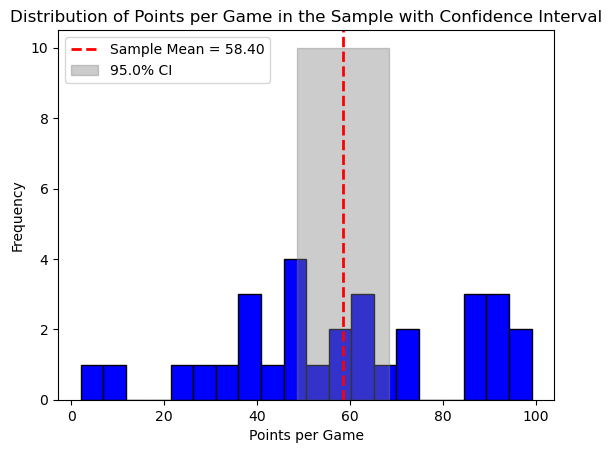

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, ttest_1samp
import random

# Select a random sample (e.g., sample size of 30) from your dataset
sample_external = [random.randint(1, 100) for i in range(30)]

# Calculate the sample mean
sample_mean = sum(sample_external) / len(sample_external)

# Calculate the standard error of the mean (SEM)
sem = np.std(sample_external, ddof=1) / np.sqrt(len(sample_external))

# Define population mean and confidence level
population_mean = nba_data2023['PTS'].mean()
confidence_level = 0.95

# Calculate the t-statistic for the confidence interval
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, df=len(sample_external) - 1)

# Calculate the margin of error
margin_of_error = t_critical * sem

# Calculate the confidence interval bounds
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample_external, population_mean)

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Population Mean: {population_mean:.2f}")
print(f"Confidence Interval (Lower): {ci_lower:.2f}")
print(f"Confidence Interval (Upper): {ci_upper:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < alpha:
    print("Reject the null hypothesis: The sample is likely not from the same population.")
else:
    print("Fail to reject the null hypothesis: The sample is likely from the same population.")

# Create a confidence interval graph
plt.hist(sample_external, bins=20, color='blue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Sample Mean = {sample_mean:.2f}')
plt.fill_betweenx([0, 10], ci_lower, ci_upper, color='gray', alpha=0.4, label=f'{confidence_level*100}% CI')

plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game in the Sample with Confidence Interval')
plt.legend()
plt.show()

In [20]:
import pandas as pd

nba_data2023 = pd.read_csv('nba_per_game_processed.csv', encoding = 'unicode_escape', engine ='python')

print("Number of rows before filtering:", len(nba_data2023))

# Count the number of zeros in each row
zero_counts = (nba_data2023 == 0).sum(axis=1)

# Filter rows with less than or equal to 5 zeros
nba_data_filtered = nba_data2023[zero_counts <= 20]

print("Number of rows after filtering:", len(nba_data_filtered))



Number of rows before filtering: 539
Number of rows after filtering: 538
